In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nodes = pd.read_csv("/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/nodes_big_city_graph.csv")

In [3]:
edges = pd.read_csv("/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/edges_big_city_graph.csv")

ValueError: No axis named A1 for object type DataFrame

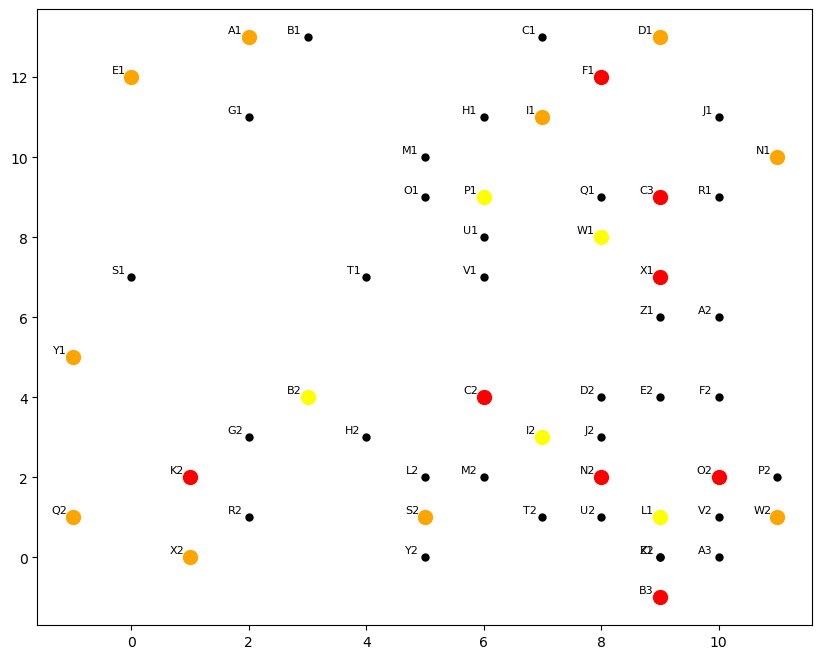

In [5]:
# Create a scatter plot with different colors for each type
plt.figure(figsize=(10, 8))

# Plot each type with different colors
ext_nodes = nodes[nodes['type'] == 'ext']
dom_nodes = nodes[nodes['type'] == 'dom']
act_nodes = nodes[nodes['type'] == 'act']
nan_nodes = nodes[nodes['type'].isna()]

plt.scatter(ext_nodes['x'], ext_nodes['y'], c='orange', label='ext', s=100)
plt.scatter(dom_nodes['x'], dom_nodes['y'], c='yellow', label='dom', s=100)
plt.scatter(act_nodes['x'], act_nodes['y'], c='red', label='act', s=100)
plt.scatter(nan_nodes['x'], nan_nodes['y'], c='black', label='NaN', s=25)

# Add labels for each node
for idx, row in nodes.iterrows():
    plt.annotate(row['node'], (row['x']-0.1, row['y']+0.1), fontsize=8, ha='right')

for idx, row in edges.iterrows():
    plt.plot(nodes.loc(row['node1'])['x'],nodes.loc(row['node2'])['y'])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Nodes by Type')
plt.show()

In [ ]:
# Plot edges in 2D on top of previous node scatter
plt.figure(figsize=(10, 8))
# plot nodes as before (reuse ext_nodes, dom_nodes, act_nodes, nan_nodes)
plt.scatter(ext_nodes['x'], ext_nodes['y'], c='orange', label='ext', s=100)
plt.scatter(dom_nodes['x'], dom_nodes['y'], c='yellow', label='dom', s=100)
plt.scatter(act_nodes['x'], act_nodes['y'], c='red', label='act', s=100)
plt.scatter(nan_nodes['x'], nan_nodes['y'], c='black', label='NaN', s=25)
# draw edges
for (c1, c2) in edge_coords:
    x_vals = [c1[0], c2[0]]
    y_vals = [c1[1], c2[1]]
    plt.plot(x_vals, y_vals, c='gray', linewidth=0.8, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Nodes and Edges (2D)')
plt.show()

In [ ]:
# Plot edges in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# plot nodes
ax.scatter(ext_nodes['x'], ext_nodes['y'], ext_nodes['z'], c='orange', label='ext', s=100)
ax.scatter(dom_nodes['x'], dom_nodes['y'], dom_nodes['z'], c='yellow', label='dom', s=100)
ax.scatter(act_nodes['x'], act_nodes['y'], act_nodes['z'], c='red', label='act', s=100)
ax.scatter(nan_nodes['x'], nan_nodes['y'], nan_nodes['z'], c='black', label='NaN', s=25)
# draw edges in 3D
for (c1, c2) in edge_coords:
    xs = [c1[0], c2[0]]
    ys = [c1[1], c2[1]]
    zs = [c1[2], c2[2]]
    ax.plot(xs, ys, zs, c='gray', linewidth=0.8, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title('Nodes and Edges (3D)')
plt.show()

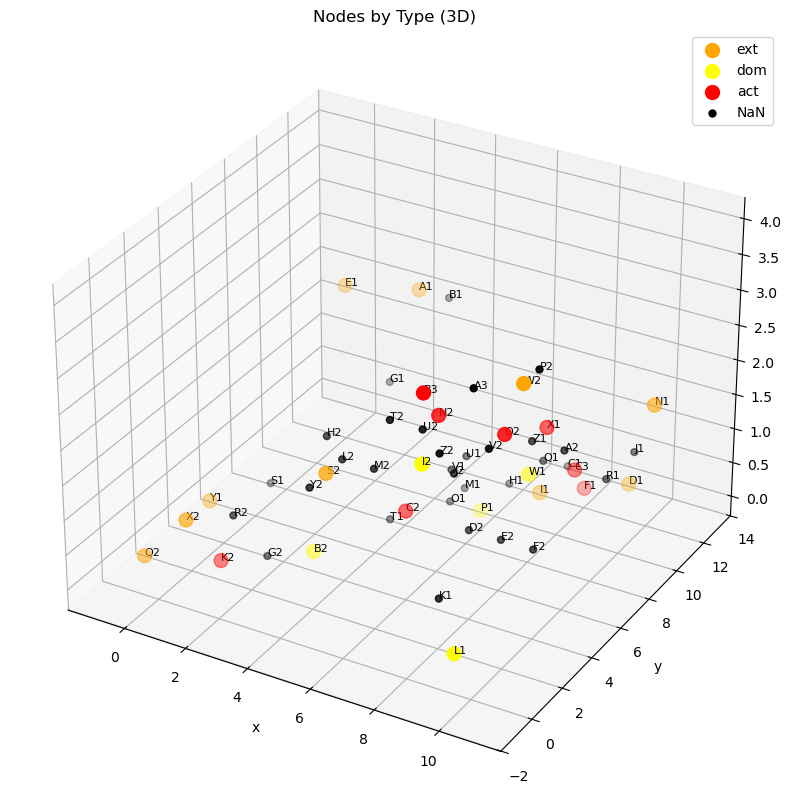

In [4]:
# Create a 3D scatter plot with different colors for each type
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each type with different colors
ax.scatter(ext_nodes['x'], ext_nodes['y'], ext_nodes['z'], c='orange', label='ext', s=100)
ax.scatter(dom_nodes['x'], dom_nodes['y'], dom_nodes['z'], c='yellow', label='dom', s=100)
ax.scatter(act_nodes['x'], act_nodes['y'], act_nodes['z'], c='red', label='act', s=100)
ax.scatter(nan_nodes['x'], nan_nodes['y'], nan_nodes['z'], c='black', label='NaN', s=25)

# Add labels for each node
for idx, row in nodes.iterrows():
    ax.text(row['x'], row['y'], row['z'], row['node'], fontsize=8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title('Nodes by Type (3D)')
plt.show()